In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# About the Project
This project presents a comprehensive analysis of India's electric vehicle market, focusing on segmentation derived from sales data, customer reviews, and technical specifications.

In [2]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [4]:
df.sample(5)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
35,42,Salaried,Married,Post Graduate,3,No,No,Yes,2400000,1300000,3700000,SUV,1600000
17,27,Salaried,Single,Graduate,0,Yes,No,Yes,800000,0,800000,Baleno,700000
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
54,41,Salaried,Married,Graduate,2,No,No,Yes,2900000,1800000,4700000,Luxuray,3000000
84,42,Salaried,Married,Graduate,3,Yes,Yes,No,2700000,0,2700000,i20,800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [8]:
columns_to_scale = ['Salary', 'Wife Salary', 'Total Salary', 'Price']

df[columns_to_scale] = df[columns_to_scale] / 100000

new_column_names = {
    'Salary': 'Salary (In Lakh Per Annum)',
    'Wife Salary': 'Wife Salary (In Lakh Per Annum)',
    'Total Salary': 'Total Salary (In Lakh Per Annum)',
    'Price': 'Price (In Lakh)'
}

df.rename(columns=new_column_names, inplace=True)

In [9]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary (In Lakh Per Annum),Wife Salary (In Lakh Per Annum),Total Salary (In Lakh Per Annum),Make,Price (In Lakh)
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,8.0,0.0,8.0,i20,8.0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,14.0,6.0,20.0,Ciaz,10.0
2,45,Business,Married,Graduate,4,Yes,Yes,No,18.0,0.0,18.0,Duster,12.0
3,41,Business,Married,Post Graduate,3,No,No,Yes,16.0,6.0,22.0,City,12.0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,18.0,8.0,26.0,SUV,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,24.0,0.0,24.0,SUV,16.0
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,38.0,13.0,51.0,SUV,16.0
96,51,Business,Married,Graduate,2,Yes,Yes,No,22.0,0.0,22.0,Ciaz,11.0
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,27.0,13.0,40.0,Creata,15.0


In [32]:
(df['Marrital Status'].value_counts()/len(df))*100

Marrital Status
Married    84.848485
Single     15.151515
Name: count, dtype: float64

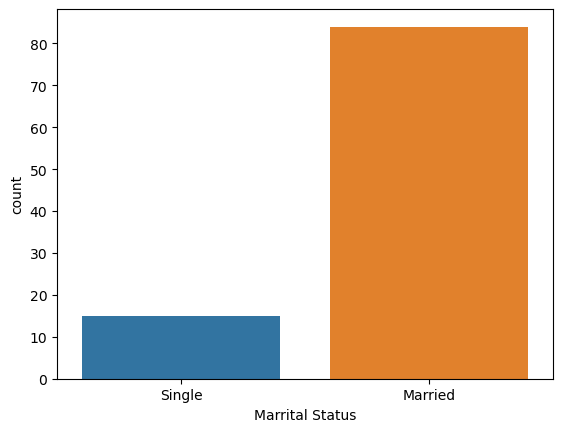

In [31]:
sns.countplot(x=df['Marrital Status'])
plt.show()

In [10]:
Marrital_Status_single=df[df['Marrital Status']=='Single']

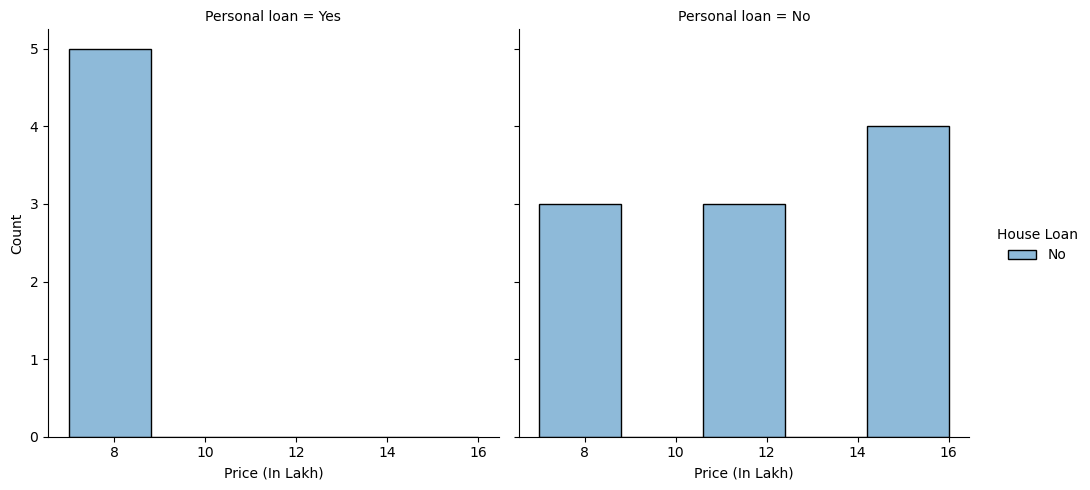

In [11]:
sns.displot(Marrital_Status_single, x="Price (In Lakh)", col="Personal loan", hue='House Loan')

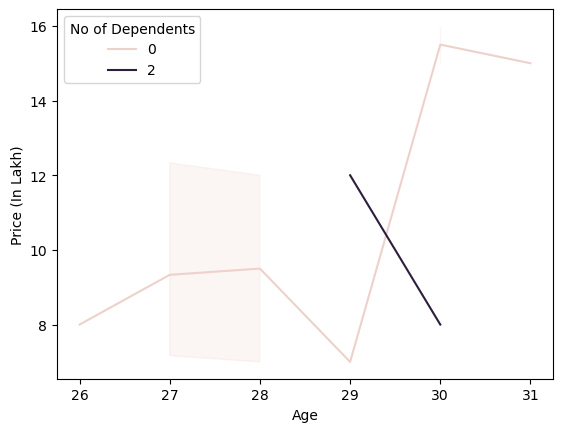

In [12]:
sns.lineplot(data=Marrital_Status_single, x="Age", y="Price (In Lakh)", hue="No of Dependents")
plt.show()

In [13]:
Marrital_Status_married=df[df['Marrital Status']=='Married']

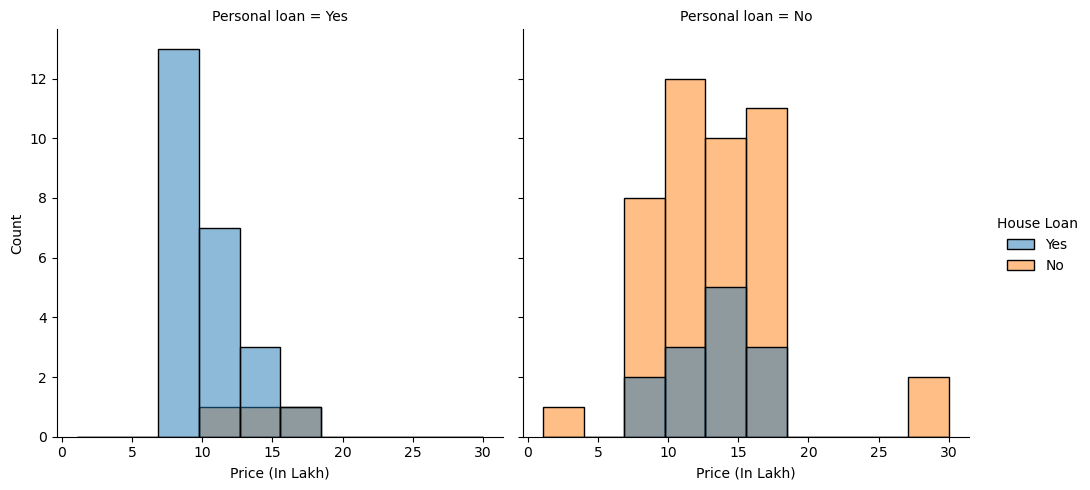

In [14]:
sns.displot(Marrital_Status_married, x="Price (In Lakh)", col="Personal loan", hue='House Loan')

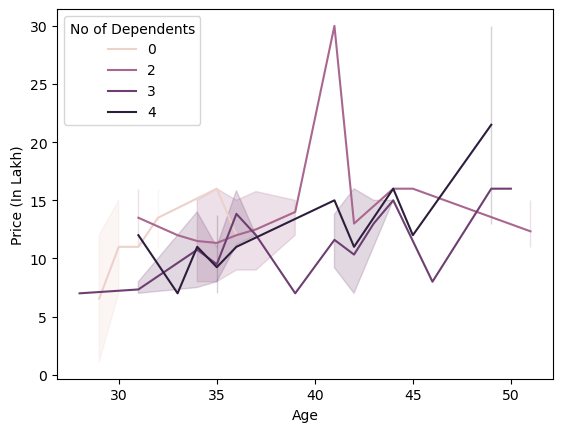

In [15]:
sns.lineplot(data=Marrital_Status_married, x="Age", y="Price (In Lakh)", hue="No of Dependents")
plt.show()

In [30]:
(df['Profession'].value_counts() /len(df))*100

Profession
Salaried    64.646465
Business    35.353535
Name: count, dtype: float64

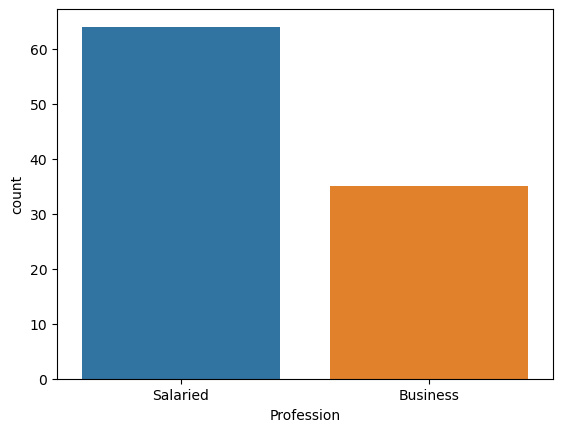

In [26]:
sns.countplot(x=df['Profession'])
plt.show()

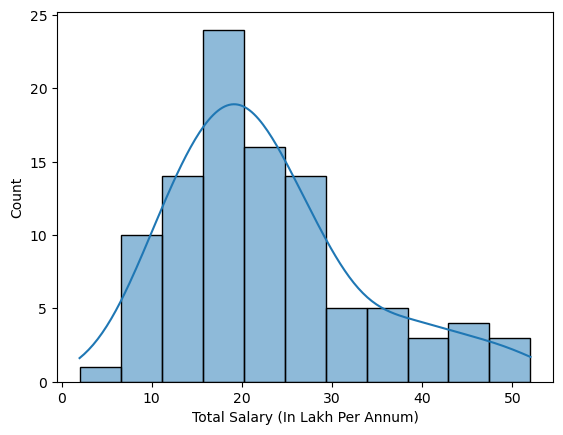

In [34]:
sns.histplot(x=df['Total Salary (In Lakh Per Annum)'],kde=True)
plt.show()

In [17]:
Profession_Salaried=df[df['Profession']=='Salaried']

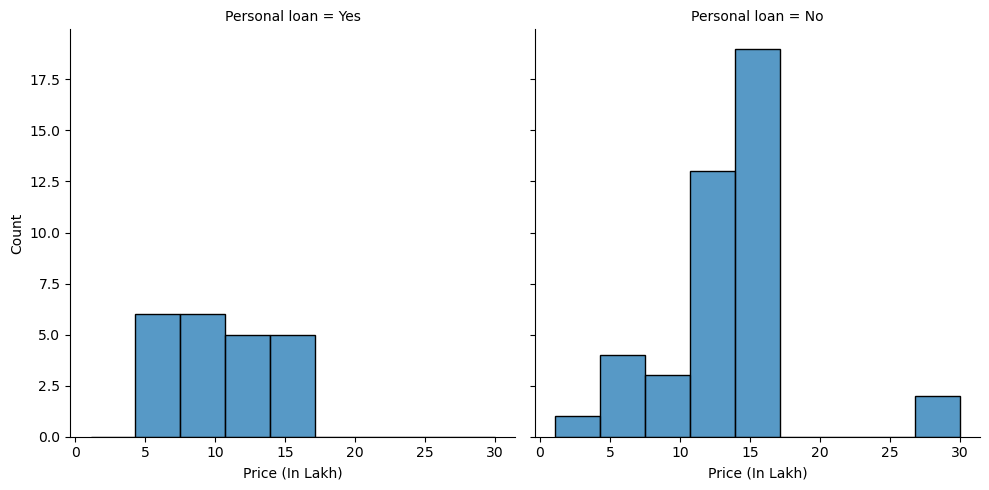

In [19]:
sns.displot(Profession_Salaried, x="Price (In Lakh)", col="Personal loan")

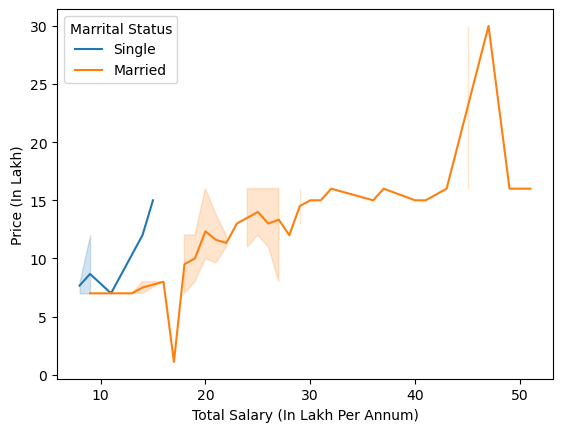

In [22]:
sns.lineplot(data=Profession_Salaried, x="Total Salary (In Lakh Per Annum)", y="Price (In Lakh)", hue='Marrital Status')
plt.show()

In [23]:
Profession_Business=df[df['Profession']=='Business']

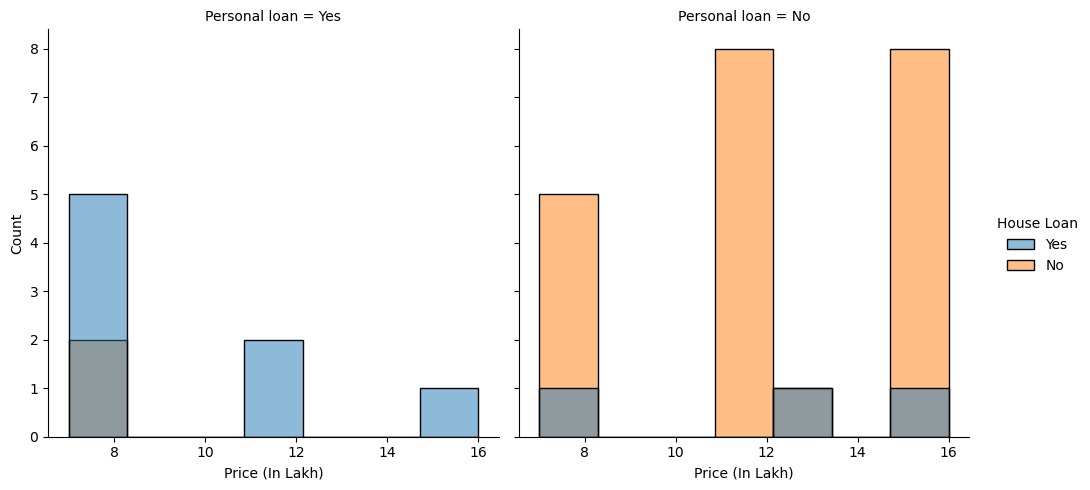

In [24]:
sns.displot(Profession_Business, x="Price (In Lakh)", col="Personal loan", hue='House Loan')
plt.show()

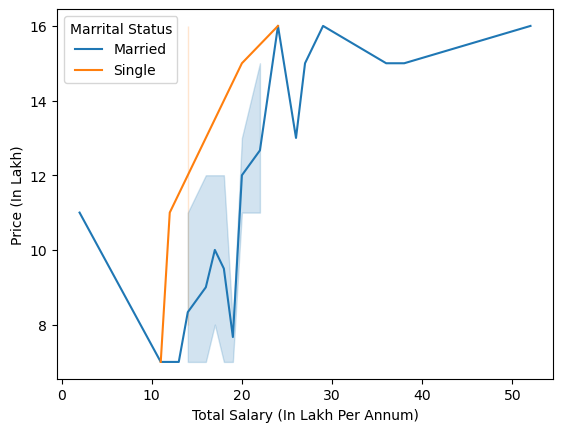

In [25]:
sns.lineplot(data=Profession_Business, x="Total Salary (In Lakh Per Annum)", y="Price (In Lakh)", hue='Marrital Status')
plt.show()

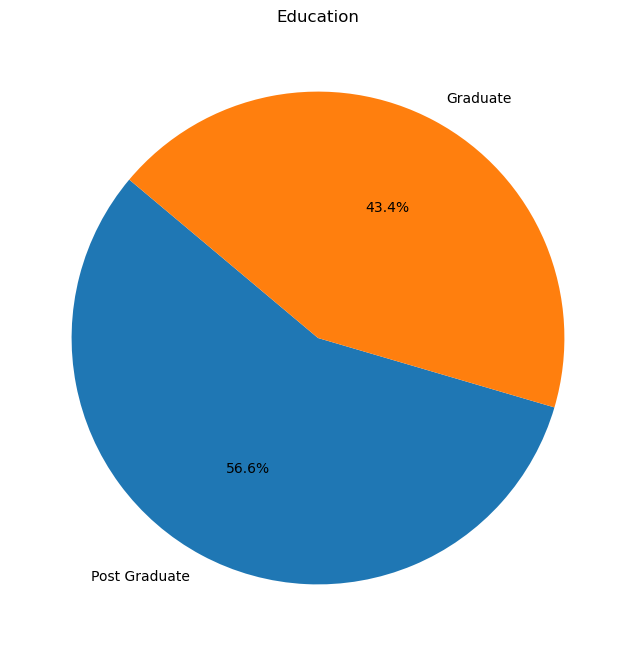

In [35]:
Education_counts = df['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Education_counts, labels=['Post Graduate',  'Graduate'], autopct='%1.1f%%', startangle=140)
plt.title('Education')
plt.show()

In [36]:
df2=pd.read_csv("ev-charging-stations-india.csv")

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [38]:
df2.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [39]:
(df2['address'].isnull().sum()/len(df2))*100

2.5856496444731736

In [40]:
df2.dropna(inplace=True)

In [41]:
df2.isnull().sum()

name         0
state        0
city         0
address      0
lattitude    0
longitude    0
type         0
dtype: int64

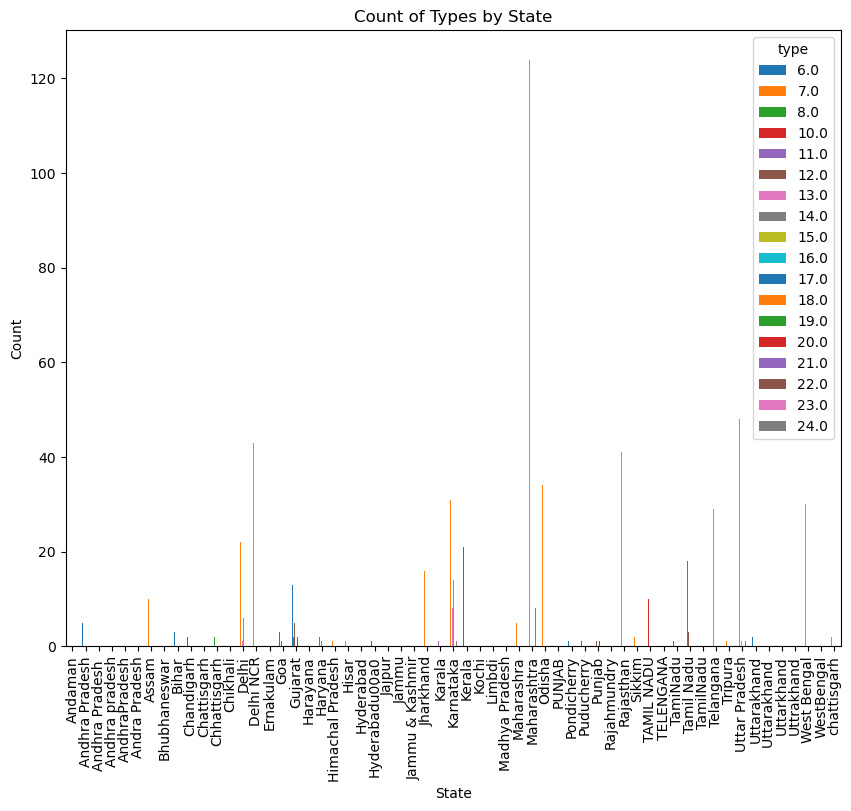

In [42]:
state_type_counts = df2.groupby(['state', 'type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 8))
state_type_counts.plot(kind='bar', ax=ax)
ax.set_xticklabels(state_type_counts.index, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Count')
ax.set_title('Count of Types by State')
plt.show()

In [43]:
df = pd.read_csv("car_data.csv")

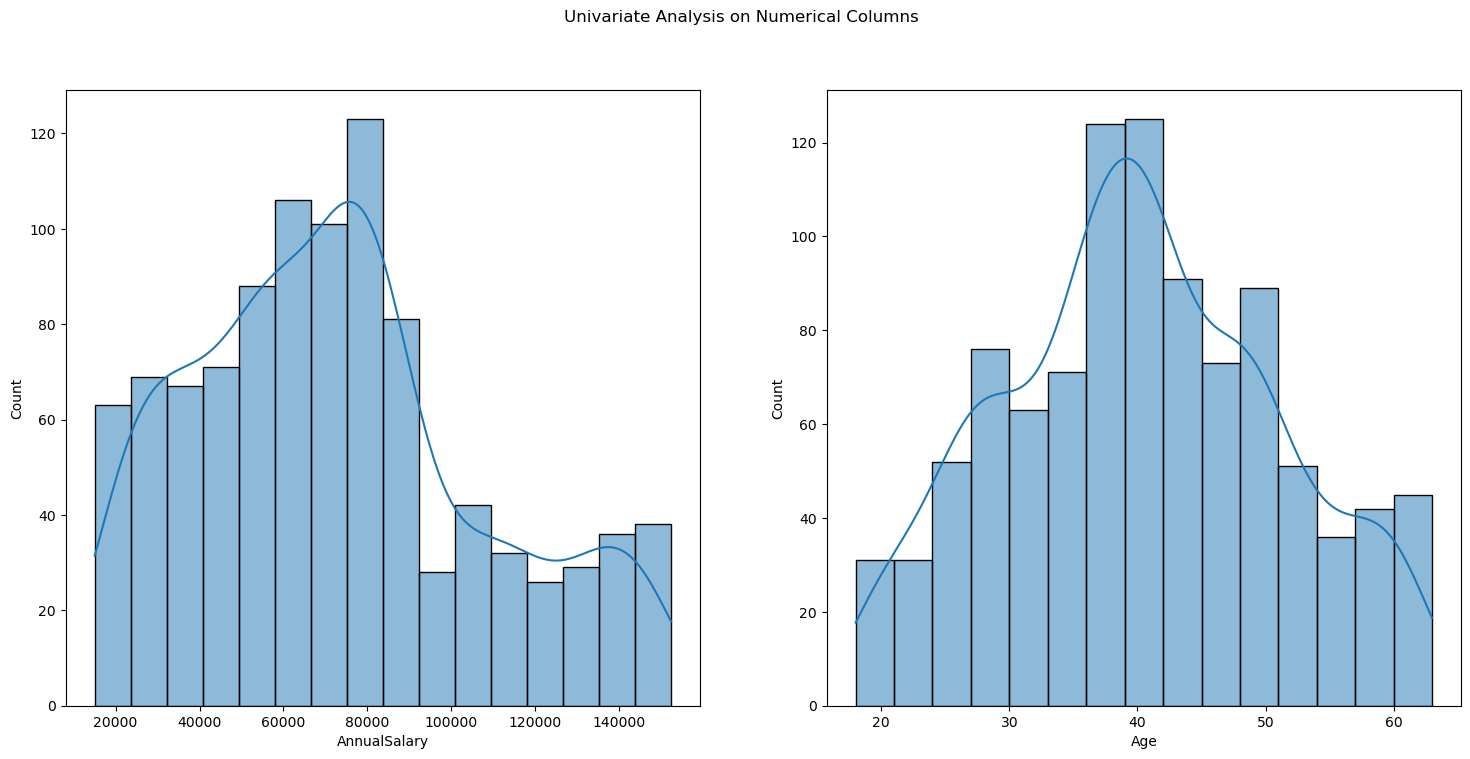

In [44]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.histplot(df['AnnualSalary'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['Age'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

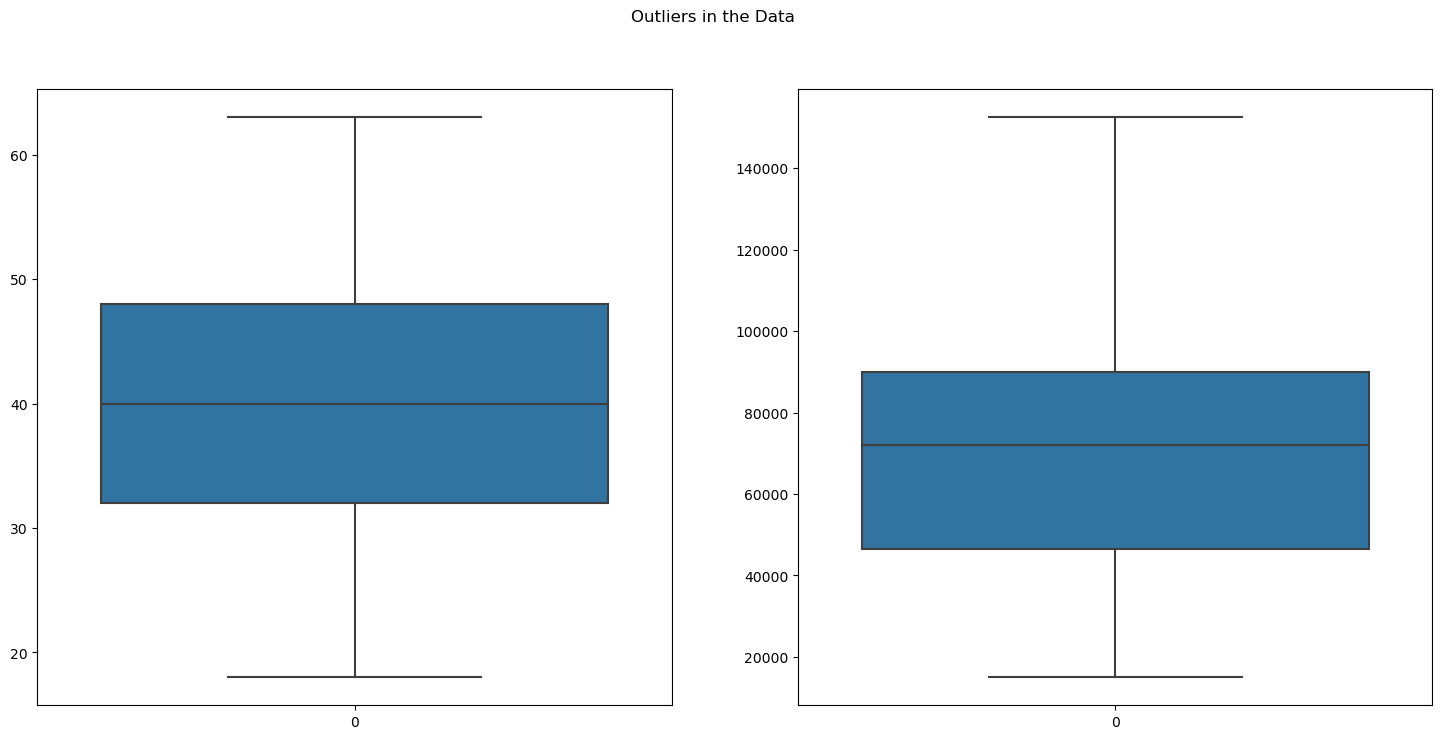

In [45]:
plt.subplot(1, 2, 1)
sns.boxplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['AnnualSalary'])

plt.suptitle('Outliers in the Data')
plt.show()

In [48]:
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.options.display.max_columns = None


In [49]:
data_smev = pd.read_excel('smev_data.xlsx',sheet_name=None)

In [50]:
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [51]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


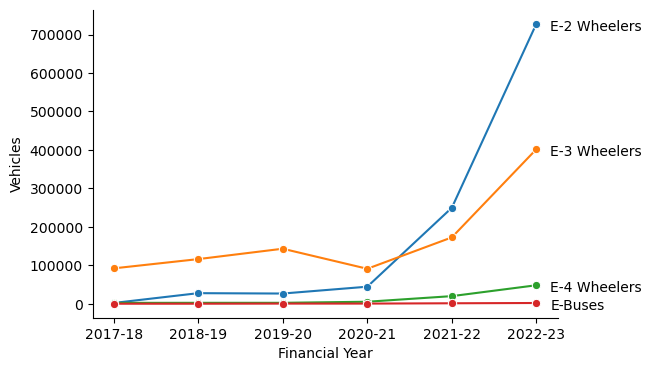

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

for col in data_smev['EV Industries']['category'].unique():
    last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

In [55]:
data_smev['EV Market'] = data_smev['EV Market'].sort_values('Amount INR Cr', ascending = False)

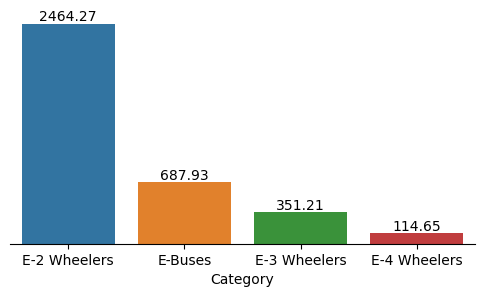

In [56]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(data=data_smev['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [57]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [58]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [59]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [60]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [61]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [62]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [63]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

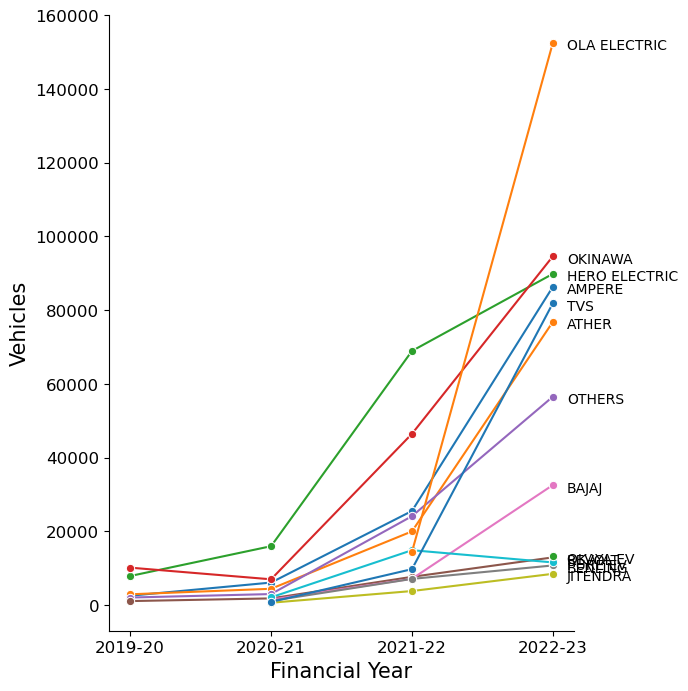

In [64]:
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

for col in data_ev2w_year['maker'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

In [72]:
df3=pd.read_csv("ev-sales.csv")

In [73]:
df3

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381
5,6,Goa,0,0,0,0,0,513,1,514
6,7,Gujarat,7182,217,8476,0,4,15388,0,31267
7,8,Haryana,3162,1504,13908,113,24,4878,0,23589
8,9,Himachal Pradesh,0,0,0,0,0,98,0,98
9,10,Jammu & Kashmir,2,76,152,0,0,208,0,438


In [74]:
df3.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [75]:
vehicle_columns = [
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
    'Two Wheelers (Category L2 (CMVR))',
    'Two Wheelers (Max power not exceeding 250 Watts)',
    'Three Wheelers (Category L5 slow speed as per CMVR)',
    'Three Wheelers (Category L5 as per CMVR)',
    'Passenger Cars (Category M1 as per CMVR)',
    'Buses'
]

for col in vehicle_columns:
    df3[f'{col} Market Share'] = (df3[col] / df3['Total in state']) * 100


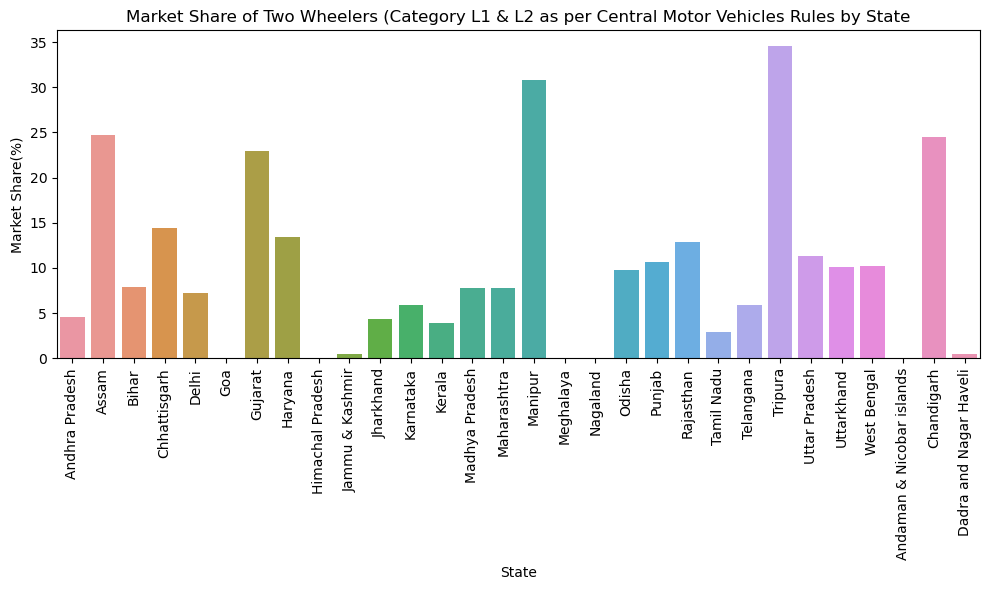

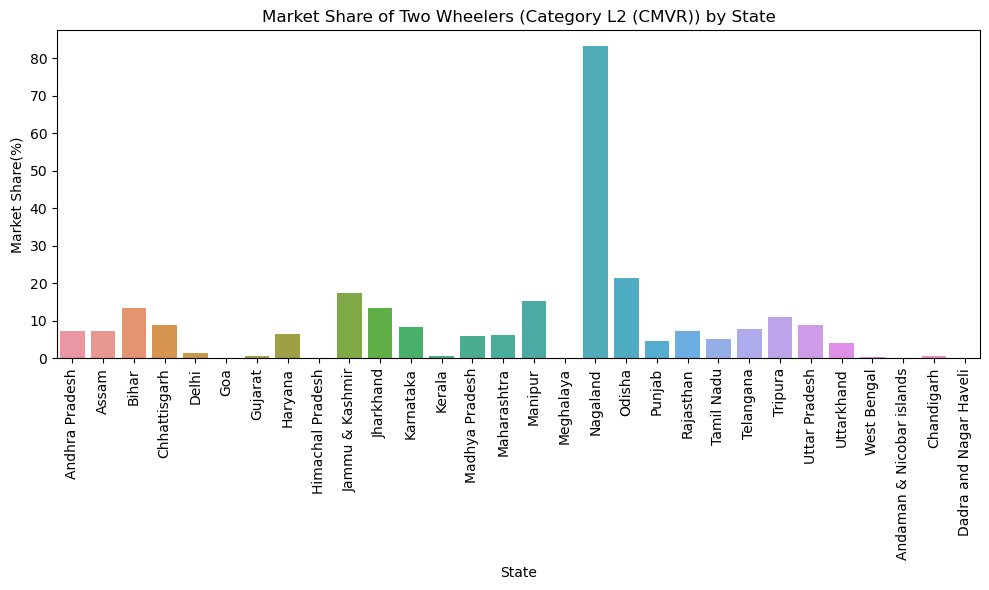

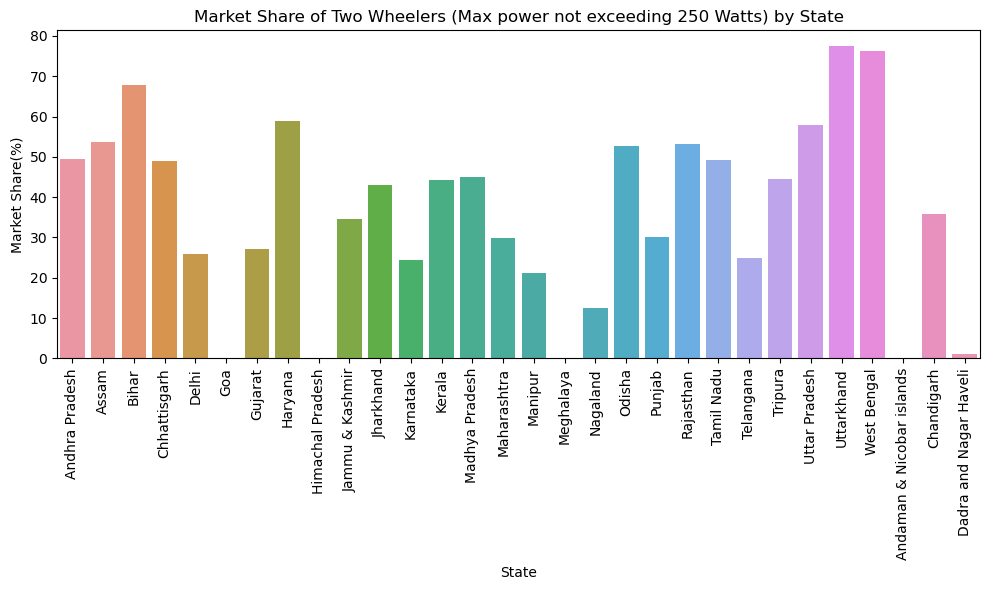

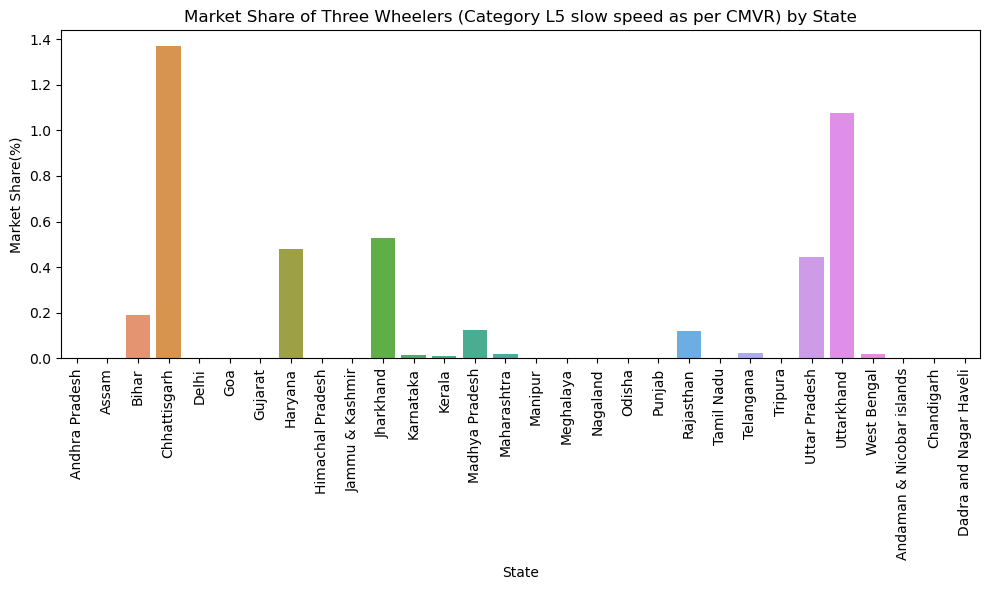

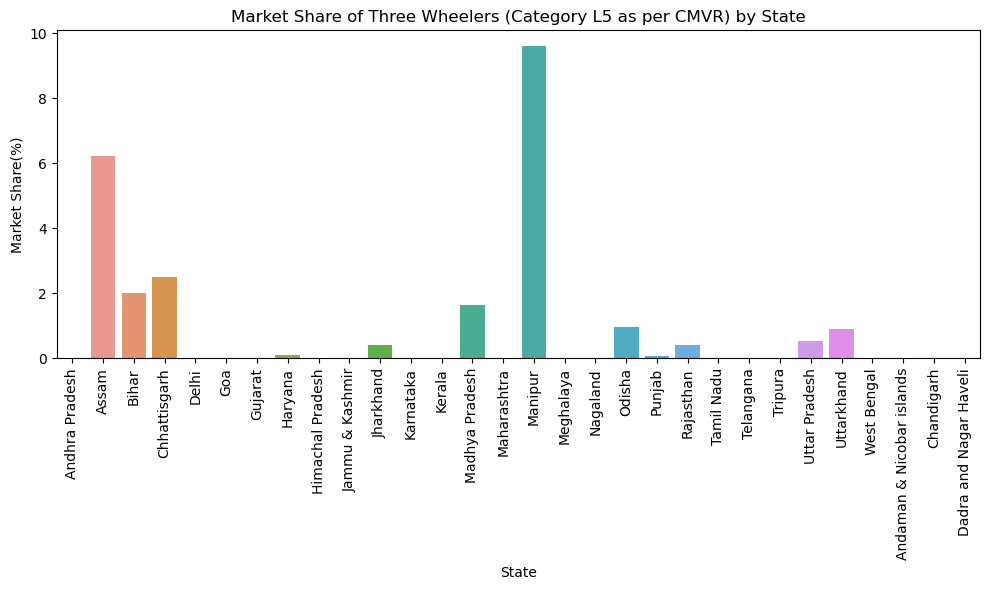

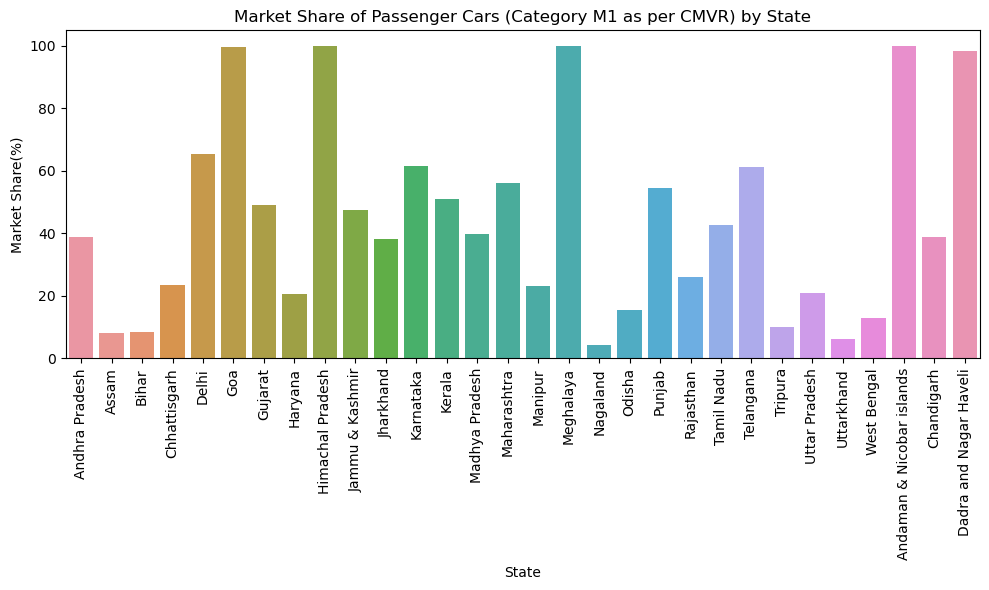

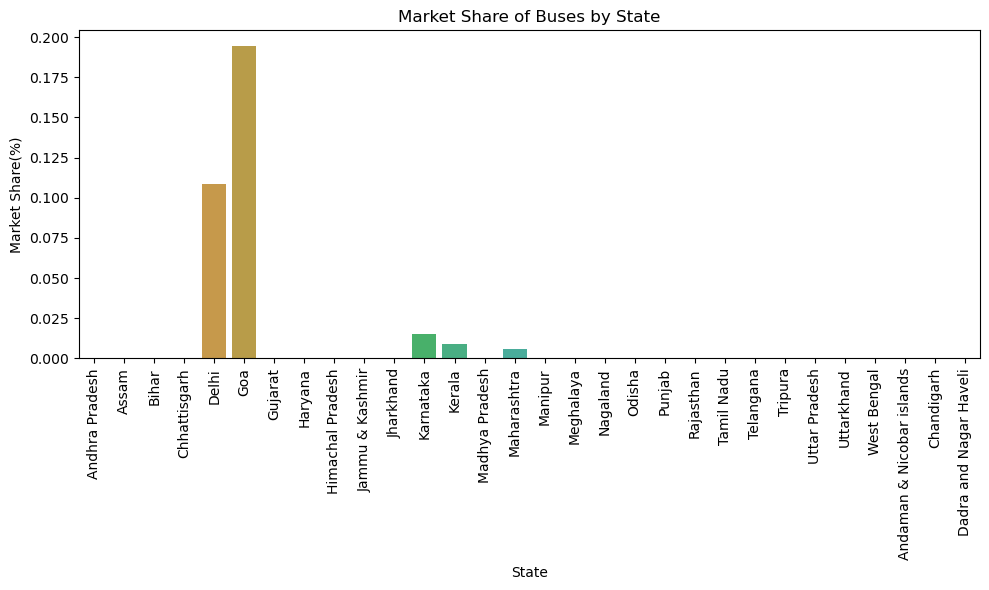

In [76]:
for col in vehicle_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df3, x='State', y=f'{col} Market Share')
    plt.title(f'Market Share of {col} by State')
    plt.xlabel('State')
    plt.ylabel('Market Share(%)')
    plt.xticks(rotation=90)
    plt.savefig("Market.png")
    plt.tight_layout()
    plt.show()

In [77]:
data_bw = pd.read_csv("2-wheeler-EV-bikewale.csv")
data_model = pd.read_csv("ev_model_spec (2).csv")

In [78]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [79]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [80]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [82]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data['sentiment'] = sentiments_list

In [83]:
data['sentiment'].value_counts()

sentiment
positive    527
negative    264
neutral      53
Name: count, dtype: int64

In [84]:
data_segment = data[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [85]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [86]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [87]:
data_segment = data.iloc[:, 5:13].copy()

In [88]:
data_segment = data_segment.fillna(0.)

In [89]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [90]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
scaler.fit(data_segment)
data_scaled = scaler.transform(data_segment)

In [94]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [95]:
data_pca = pca.transform(data_scaled)

In [96]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [97]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [98]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [99]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [100]:
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


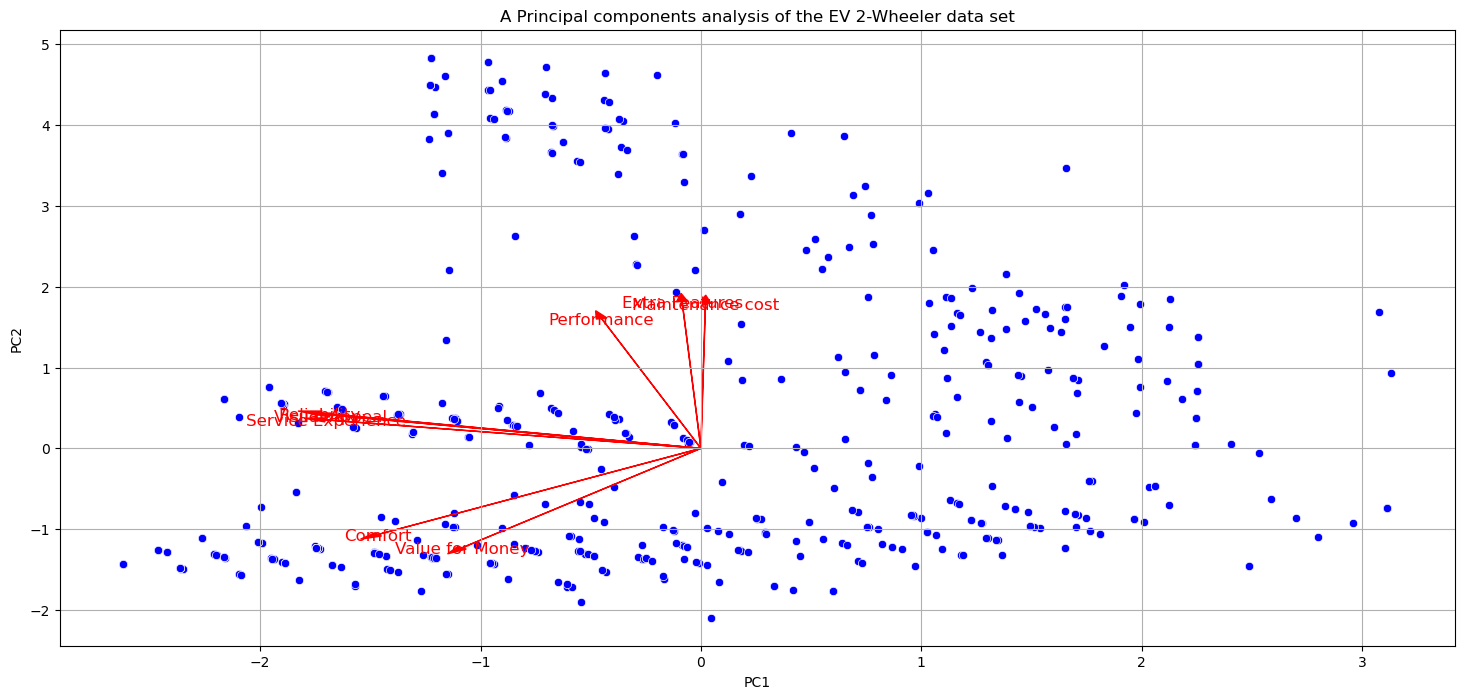

In [101]:

index_names = factor_loadings.index

sns.scatterplot(data=df_pca, x = 'PC1', y = 'PC2', color = 'blue')

for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [103]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

In [105]:
data['Cluster'] = cluster_labels

In [107]:
sil_score = silhouette_score(data_scaled, cluster_labels)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.5134637469853868


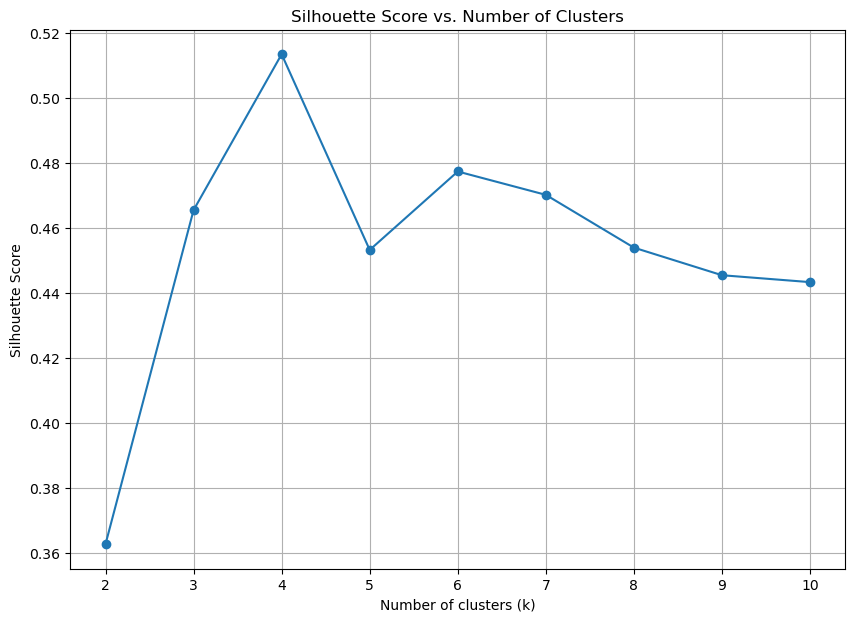

In [109]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    sil_score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(sil_score)

# Plot silhouette scores vs number of clusters
plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K)
plt.grid(True)
plt.show()

In [110]:
from sklearn.cluster import DBSCAN

DBSCAN Silhouette Score:  0.0816047998119476


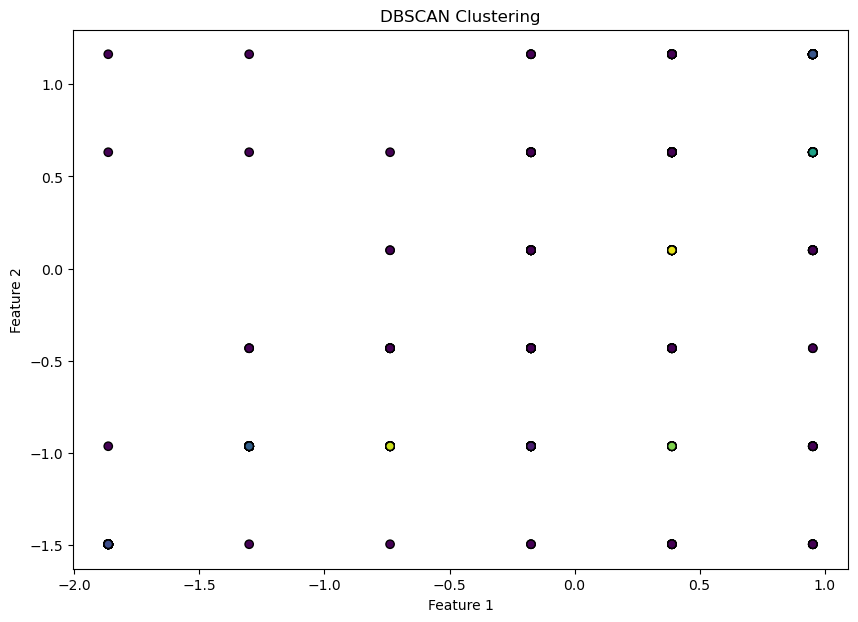

In [112]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels_dbscan = dbscan.fit_predict(data_scaled)

# Add the DBSCAN cluster labels to the original dataframe
data['Cluster_DBSCAN'] = cluster_labels_dbscan

# Calculate and print the DBSCAN silhouette score
sil_score_dbscan = silhouette_score(data_scaled, cluster_labels_dbscan) if len(set(cluster_labels_dbscan)) > 1 else -1
print("DBSCAN Silhouette Score: ", sil_score_dbscan)

# Plotting the DBSCAN clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels_dbscan, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [113]:
from sklearn.cluster import AgglomerativeClustering

Hierarchical Silhouette Score:  0.4731784366794371


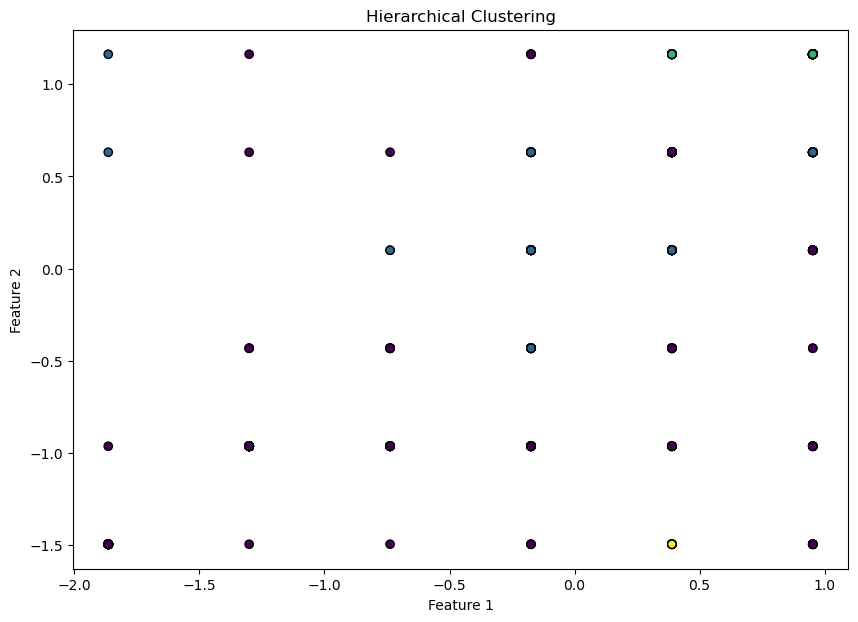

In [116]:
hierarchical = AgglomerativeClustering(n_clusters=4)
cluster_labels_hierarchical = hierarchical.fit_predict(data_scaled)

# Add the hierarchical cluster labels to the original dataframe
data['Cluster_Hierarchical'] = cluster_labels_hierarchical

# Calculate and print the hierarchical silhouette score
sil_score_hierarchical = silhouette_score(data_scaled, cluster_labels_hierarchical)
print("Hierarchical Silhouette Score: ", sil_score_hierarchical)

# Plotting the hierarchical clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels_hierarchical, cmap='viridis', marker='o', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [117]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [118]:
kmeans = data_km28[2]

In [119]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [120]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

In [121]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [122]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [123]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

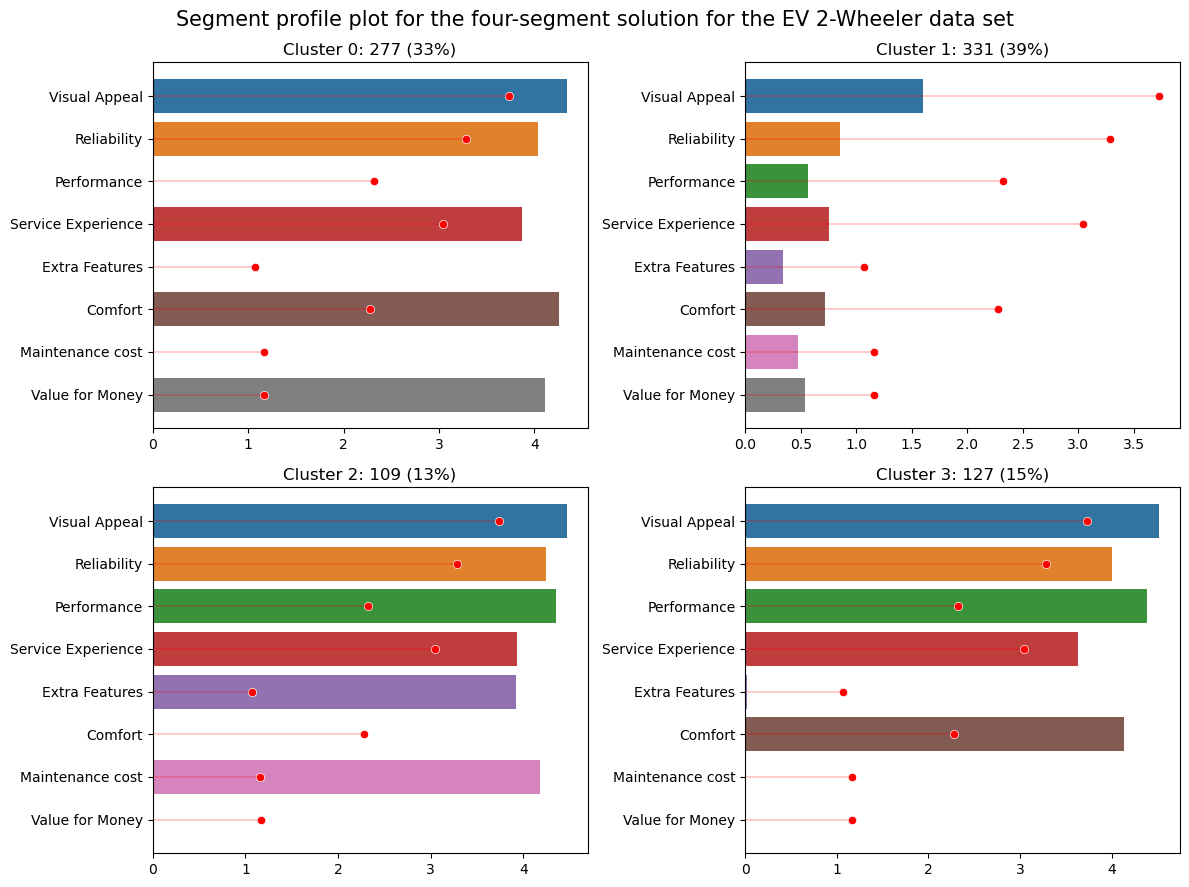

In [124]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data=data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

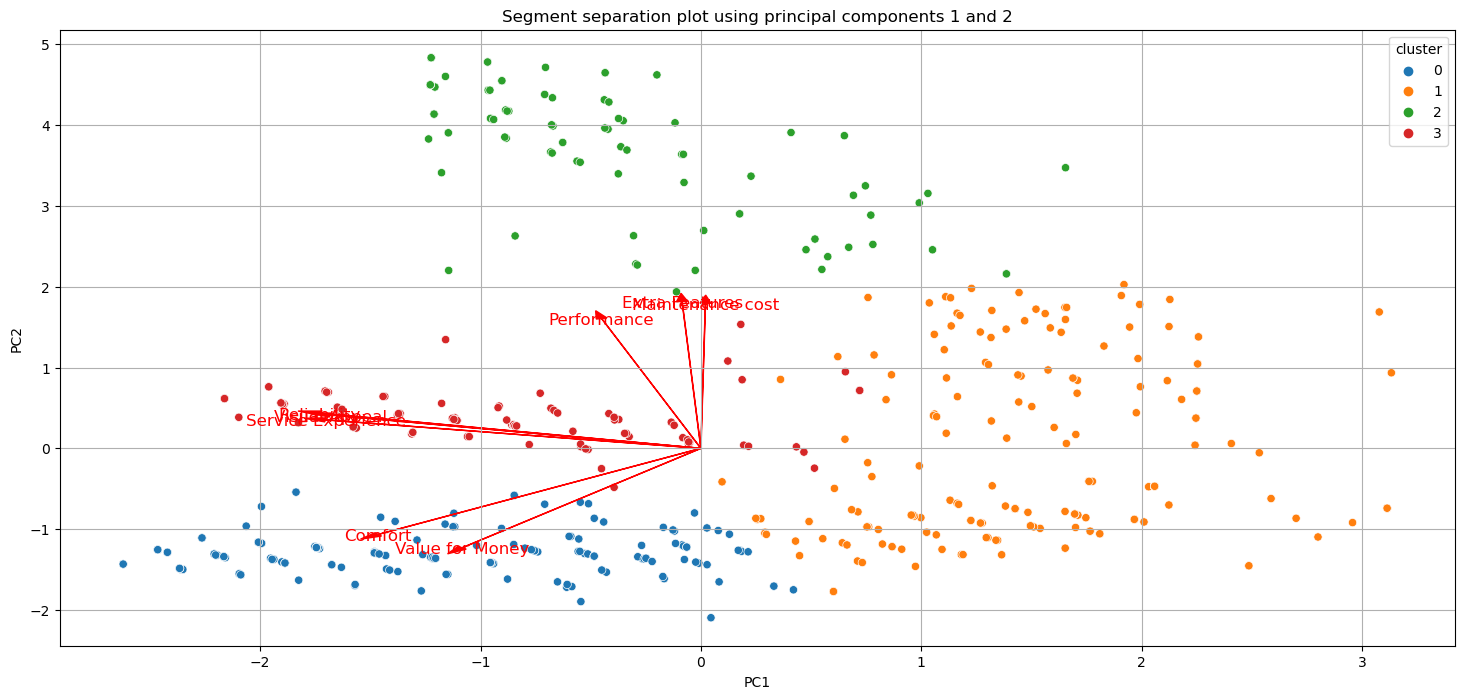

In [126]:

index_names = factor_loadings.index

sns.scatterplot(data=data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

In [127]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [128]:
data_desc.columns   

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'Cluster', 'Cluster_DBSCAN', 'Cluster_Hierarchical',
       'cluster'],
      dtype='object')

In [129]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

In [130]:
colors = ['#FFA62F', '#FFC96F', '#FFE8C8', '#D62728', '#ACD793', '#8C564B']

In [131]:
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])

In [132]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,30,41,206
1,205,8,118
2,16,0,93
3,13,4,110


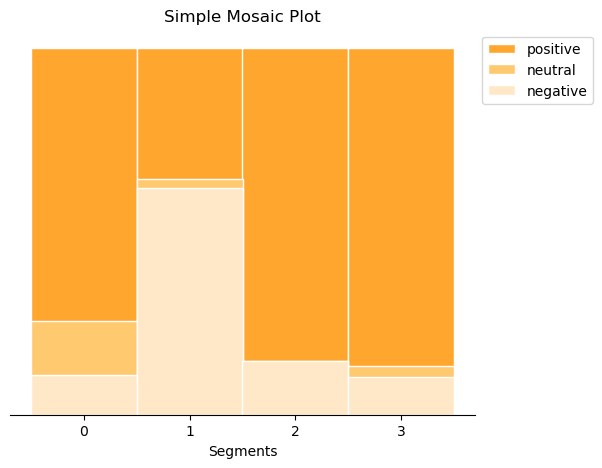

In [134]:
mosaicplot(sentiment_cluster, colors[:3], figsize=(6,5), barwidth = 1)

In [135]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [136]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,194,55,7,19,2
1,245,47,7,27,5
2,86,19,2,1,1
3,75,39,4,9,0


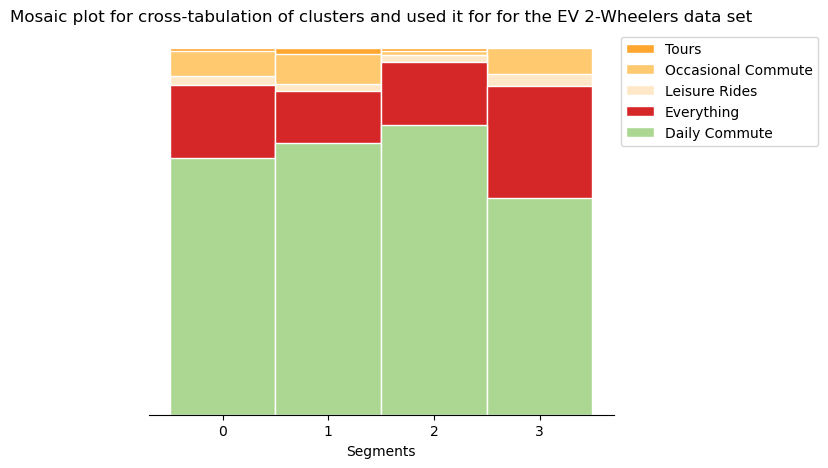

In [138]:
mosaicplot(used_cluster, colors[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

In [139]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

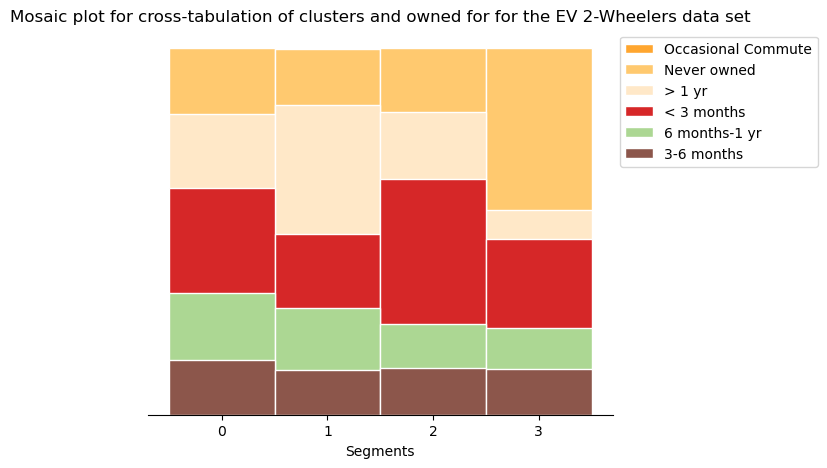

In [140]:
mosaicplot(owned_cluster, colors[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

In [141]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

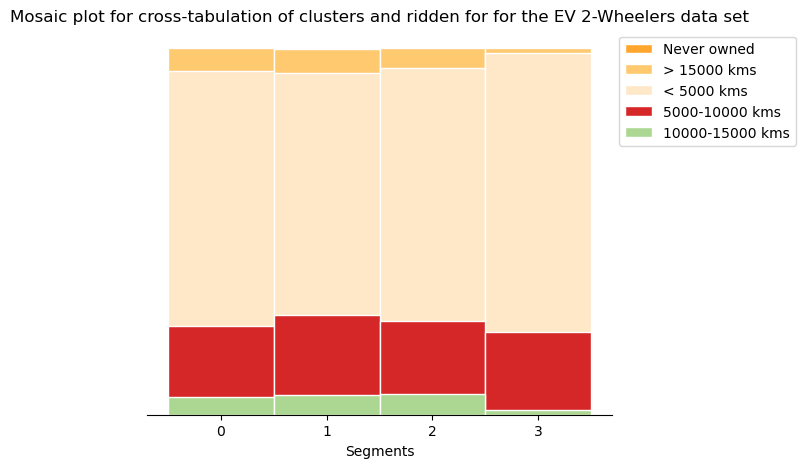

In [142]:
mosaicplot(ridden_cluster, colors[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

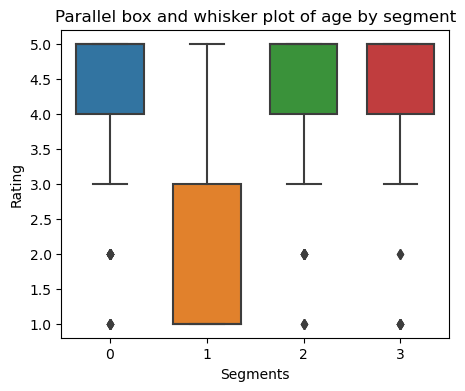

In [143]:
plt.figure(figsize = (5,4))
sns.boxplot(data=data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.show()

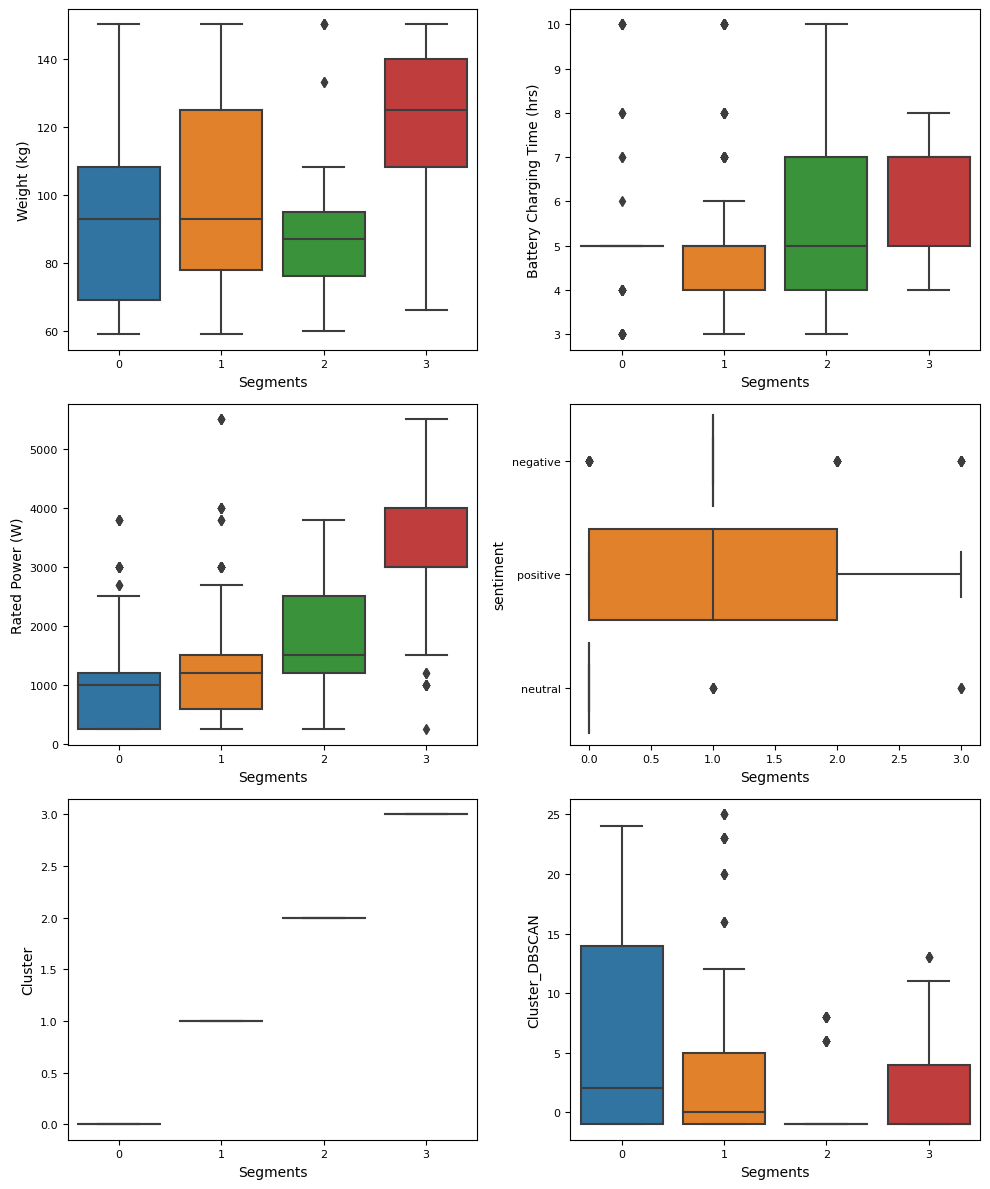

In [144]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

**In analyzing technical specification of electric vehicles across different segments, distinct patterns emerge. Segment 0 prefers premium EVs with a higher price range and extended riding range, emphasizing consumer preference for luxury and long-distance travel. Segment 1 focuses on budget-friendly options with lower prices and moderate riding ranges, suitable for daily commuting. Segment 2 and Segment 3 prioritize affordability, with slight differences in riding range and speed preferences. Weight preferences vary, with Segment 0 and Segment 1 favoring heavier vehicles, while Segment 2 and Segment 3 prefer lighter options. Charging time also differs, with Segment 0 and Segment 3 opting for longer durations for overnight charging, while Segment 1 and Segment 2 prioritize faster charging for quick turnaround times. These nuanced preferences shape the electric vehicle market in India.**

# Selection of Target Segment

The strategic target segments for the electric vehicle market are identified as Segment 1 (39% of consumers) and Segment 2 (33% of consumers). Segment 1's diverse preferences and dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands. Segment 2 values visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money. The strategy involves addressing dissatisfaction points in Segment 1 and enhancing positive elements in Segment 2, aligning electric vehicles with the distinct expectations of each segment to ensure competitive advantage and sustained market growth.

# Customizing the Marketing Mix


In our electric vehicle market strategy, customization of the marketing mix is crucial for appealing to Segment 1 and Segment 2, our target segments. 
* Product customization involves enhancing features based on specific desires, addressing dissatisfaction points for Segment 1, and emphasizing visual appeal and value for money for Segment 2. Diverse offerings cater to varied tastes and budgets within each segment. 
* Price customization includes competitive pricing for Segment 1 and a slightly higher price point for value-added features in Segment 2. 
* Promotion customization focuses on targeted advertising and tailored promotional events for each segment's preferences. 
* Place customization establishes accessible distribution channels in urban areas for Segment 1 and suburban/semi-urban regions for Segment 2, with a strong emphasis on online presence and customer support. 
* People and Process Customization involves training customer service representatives to address segment-specific concerns and ensuring efficient processes for customization requests and service appointments. 
This tailored approach ensures our electric vehicles align with the distinct needs of Segment 1 and Segment 2, enhancing market relevance and customer preference.